In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('vgsales.csv')

In [62]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [63]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [64]:
df.shape

(16598, 11)

In [65]:
df['Genre'].shape

(16598,)

In [66]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [67]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [68]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [69]:
# Convert the year column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by year and sum the global sales
sales_by_year = df.groupby(df['Year'].dt.year)['Global_Sales'].sum()

# Select the years you want to count sales for
start_year = 1991
end_year = 1995

# Count the sales between start_year and end_year
sales_between_years = sales_by_year.loc[start_year:end_year].sum()

# Print the result
print(f"Total global sales between {start_year} and {end_year}: {sales_between_years}")


Total global sales between 1991 and 1995: 321.65000000000003


In [70]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by year and sum the global sales
sales_by_year = df.groupby(df['Year'].dt.year)['Global_Sales'].sum()

# Select the years you want to count sales for
start_year = 2016
end_year = 2020

# Count the sales between start_year and end_year
sales_between_years = sales_by_year.loc[start_year:end_year].sum()

# Print the result
print(f"Total global sales between {start_year} and {end_year}: {sales_between_years}")

Total global sales between 2016 and 2020: 71.27


In [71]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum()

# Calculate the total global sales across all platforms
total_sales = platform_sales.sum()

# Calculate the percentage of global sales for each platform
platform_percentage = (platform_sales / total_sales) * 100

# Print the result
print(platform_percentage)

Platform
2600     1.088287
3DO      0.001121
3DS      2.774078
DC       0.179027
DS       9.220285
GB       2.863648
GBA      3.570452
GC       2.234867
GEN      0.317922
GG       0.000448
N64      2.453691
NES      2.814547
NG       0.016143
PC       2.901426
PCFX     0.000336
PS       8.190852
PS2     14.075987
PS3     10.737587
PS4      3.117559
PSP      3.321361
PSV      0.694248
SAT      0.376551
SCD      0.020963
SNES     2.242602
TG16     0.001794
WS       0.015918
Wii     10.388613
WiiU     0.917668
X360    10.985557
XB       2.895149
XOne     1.581312
Name: Global_Sales, dtype: float64


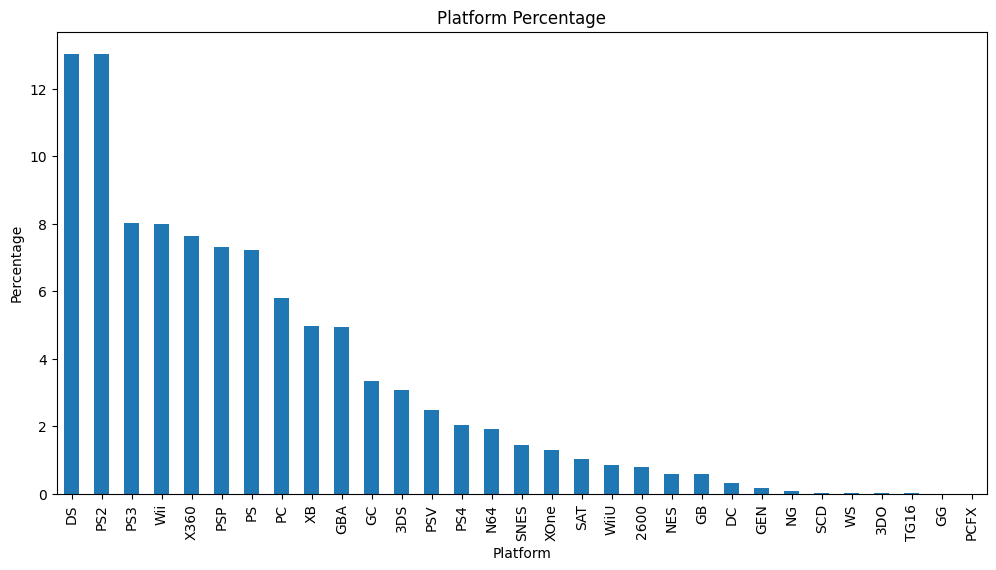

In [72]:
import matplotlib.pyplot as plt

platform_percentage = df['Platform'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
platform_percentage.plot(kind='bar')
plt.title('Platform Percentage')
plt.xlabel('Platform')
plt.ylabel('Percentage')

plt.show()

In [73]:
import pandas as pd
import plotly.express as px

# Read the CSV file
# df = pd.read_csv('vgsales.csv')

# Group the data by platform and calculate the total sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Calculate the percentage of global sales for each platform
platform_sales['Sales_Percentage'] = platform_sales['Global_Sales'] / platform_sales['Global_Sales'].sum() * 100

# Create a pie chart using Plotly Express
fig = px.pie(platform_sales, values='Sales_Percentage', names='Platform', title='Platform Percentage of Global Sales')
fig.show()


In [74]:
platform_counts = df['Platform'].value_counts(normalize=True) * 100

# Create a pie chart of platform percentages
fig = px.pie(platform_counts, values='Platform', names=platform_counts.index, title='Platform Distribution')
fig.show()

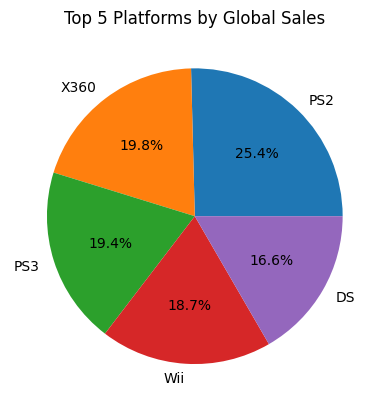

In [76]:
top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(5)


plt.pie(top_platforms.values, labels=top_platforms.index, autopct='%1.1f%%')
plt.title('Top 5 Platforms by Global Sales')
plt.show()
